# The Ising model

In [1]:
import numpy
import matplotlib.pyplot as plt

## The following package is required to update the plot within the same figure
from IPython.display import clear_output

To update our plots during the simulation we run in this notebook we define the function *live_plot* in the following cell. 

In [2]:
def live_plot(data_2D, data_1D):
    """
      Clear the figure and update the plots with newly created data
      
        :params:  - data_2D --> 2D numpy array
                  - data_1D --> Two 1D numpy arrays containing the x and y axis of the plotted data
    """
    clear_output(wait=True)
    
    ## Initialize the figure with corresponding subplots
    fig = plt.figure(figsize = (22, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    ## Plot data_2D using imshow --> Direct visualization of the spin states in the system
    ax1.imshow(data_2D, interpolation = "none", vmin = -1., vmax = 1., cmap = "hot")

    ## Plot data_1D using plot --> Magnetization as a function of time. In this simulation time corresponds to simulation steps
    ax2.plot(data_1D[:, 0], data_1D[:, 1])
    ax2.set_xlim(0, Steps)
    ax2.set_ylim(-1.1, 1.1)
    
    ax2.set_xlabel("Simulation step", fontsize = 20)
    ax2.set_ylabel("<M>", fontsize = 20)
    
    plt.show();

Onwards to the actual notebook! First we define our system parameters by defining the number of particles in our system *N* and the number of _Steps_ the simulation is executed over.

The thermal energy *kBT* and the external magnetic field _B_ are expressed in terms of the nearest neighbour exchange energy *J*.

In [7]:
N = 50
Steps = 100000

B = -1.0          # [J]
kBT = 2.3        # [J]

## Calculate the energy change due to one spin flip
def deltaE(S, i, j):
    Sij  = S[i, j]
    Enow = -Sij * (S[(i+1)%N, j] + S[(i-1)%N, j] + S[i, (j+1)%N] + S[i, (j-1)%N] + float(B)) ## Use periodic boundary conditions
    return -2 * Enow

Now we initialize the system by randomly defining the spins. We do this by generating a two by two array with values between 0 and 1. All values below 0.5 correspond to spin down, *i.e.* -1 and all values above 0.5 correspond to spin up, _i.e._ +1.

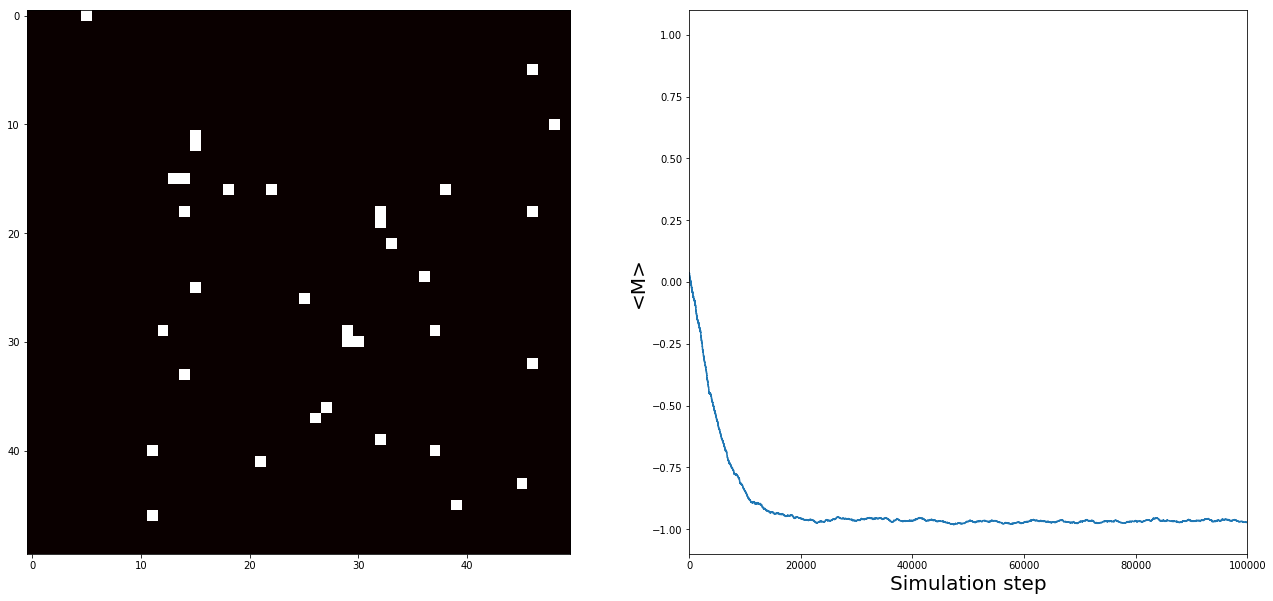

In [8]:
## Init the spins randomly (Remember: only down and up!)
spins = numpy.where(numpy.random.random((N, N)) > 0.5, 1, -1)

## Determine the magnitization. Store in numpy array with shape: (Steps, 2)
M = numpy.zeros((Steps, 2))
M[0] = 0, numpy.array([numpy.mean(spins)])


## Now define what we do for every step of the simulation
for idx in range(Steps):
    ## Select a random value for i and j
    i, j = numpy.random.randint(0, N, 2)
    ## For the selected indices i and j determine the change in energy
    dE = deltaE(spins, i, j)
    
    ## If the change in energy is smaller than 0, or a random number is smaller 
    ## than the corresponding thermal fluctuations, allow the spin change/flip
    if (dE < 0.0) or (numpy.random.random() < numpy.exp(-dE / float(kBT))):
        spins[i, j] = -spins[i, j]

    ## Determine the magnetization of the system and store into the 
    M[idx] = idx, numpy.mean(spins)
    
    ## For every 999th step, update the plots
    if idx %(999) == 0:       
        live_plot(spins, M[:idx])
